In [82]:
import numpy as np
np.random.seed(1337)
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt


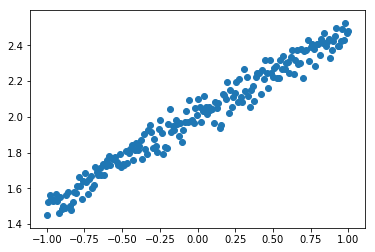

In [83]:
##### 做資料
X = np.linspace(-1, 1 , 200)
np.random.shuffle(X) 
Y = 0.5 * X + 2 + np.random.normal(0 , 0.05 , (200,))

plt.scatter(X, Y)
plt.show()

In [93]:
#### 訓練和測試資料
X_train, Y_train = X[:160], Y[:160] ## first 160 data points
X_test, Y_test = X[160:], Y[160:]   ## last 40 data points

In [100]:
#### 只需要這樣加層數就可以
model = Sequential()
model.add(Dense(units=1, input_dim=1))

#### 越多層沒有比較好
# model.add(Dense(output_dim=1))
# model.add(Dense(output_dim=1))
# model.add(Dense(output_dim=1))

In [101]:
model.compile(loss='mse', optimizer='sgd')

In [102]:
for step in range(301):
    cost = model.train_on_batch(X_train, Y_train)
    if step % 100 == 0:
        print('train cost: ', cost)

train cost:  4.02546
train cost:  0.0799673
train cost:  0.00567808
train cost:  0.00310675


In [88]:
cost = model.evaluate(X_test, Y_test, batch_size=40)
print(cost)

40/40 [==============================] - 0s 4ms/step
0.00313670327887


In [89]:
W, b = model.layers[0].get_weights()
print(W, b)

[[ 0.4922711]] [ 1.99950218]


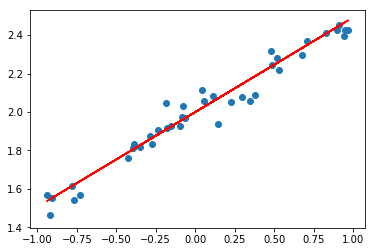

In [90]:
Y_pred = model.predict(X_test)
plt.scatter(X_test, Y_test)
plt.plot(X_test,Y_pred, c = "red")
plt.show()